# Notebook summary and setup
This notebook focuses on Machine Learning with Python: Classification (complete tutorial) a tutorial from towards data science.  The walk through can be found here:
https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec

As with all of my notebooks, there should be some level of expecation that changes have been made to deviate from the original source material.  These changes may be pointed out below, but that is not guarenteed.  Reference the source material for a pure version.

The dataset used here is from the 'Titanic dataset' from Kaggle.  Kaggle is a website that allows for the sharing of data among large groups of people.  This dataset can be found here: https://www.kaggle.com/c/titanic

The titanic dataset gives information about the passengers aboard the titanic on it's last fated voyage.

This tutorial goes through the following key targets, which can be plugged and played in scenarios involving data beyond the titanic dataset:

- Environment set up import libraries and read data
- Data Analysis: meaning and predictive power of variables
- Feature engineering: extract chosen features from raw data.
- Model design: training, tuning hyperparameters, validation, and testing
- Performance evaluation: read metrics
Explainability: how does the model produce results and what does that mean?

In [6]:
# Install kaggel for the data import.
!pip install kaggle
!pip install lime

     |████████████████████████████████| 276kB 5.6MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=7667d0b300769335308e265fc9875cc143956b5b150648dc14700cb6c8a9bc0e
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [7]:
# Set up time
#   Imports organized by use:
#     Data
import pandas as pd
import numpy as np

#     Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#     statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

#     for machine learning (general)
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

#     explainer
from lime import lime_tabular


Now that we have all of the libraries imported, there is one thing missing: the data!  Download the csv file from the Kaggle site for analysis.  It can be named whatever you like, but to plug and play it with this notebook, you may want to replicate location and naming convention of the data.

This notebook is actually designed to use the kaggle API but if you don't have access to this, the old-fashioned way (i.e. csv download/upload) will be left in the code comments.

In [ ]:
# Old way of downloading.  Note: you can deliminate at this phase but that will
#   appear further below.

#data = pd.read_csv('/path/to/data.csv')

In [8]:
'''
NOTE: At the time of making this notebook there is an issue in firefox
      which is causing an error with the below code.  Use Chrome instead.
      https://github.com/googlecolab/colabtools/issues/51
'''

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [9]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        124           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        232           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        739           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3936           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      32140            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       8272           False  
connectx

In [11]:
!kaggle competitions download "titanic"

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.7MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 7.87MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 38.2MB/s]


In [12]:
# basepath here is where the data is automatically downloaded to from the command above
basepath = "/content/"
data = pd.read_csv(basepath + "train.csv")

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we have the titanic data!  Above you can see different columns (features) and rows (observations).  In this case we're looking at information about the passengers on the Titanic.

Now that we have data we can begin the analysing process.

# Data Analysis

Vocab phrase:
- exploratory data analysis: process of summarizing the main characteristics of a dataset to understand what the data can reveal beyond formal modeling or hypothesis testing.

Let's begin with an overview of the dataset.  The tutorial begins with wanting a review of categorical and numerical variables as well as any missing data.

Data is not necessarily collected to be analyzed in an ML/AI format.  Because of this, we may need to standarize the data ourselves in a preprocessing phrase.

In [18]:
'''
Let's identify if a column (feature) holds numerical or categorical data.
variables:
  data == dataframe
  col == string name of the column (feature) to analyze
  max_cat == max number of unique values to recognize a column as categorical

If it is found to be a categorical feature, we return "cat", otherwise "num" for numerical.
'''

def utils_recognize_type(data, col, max_cat=20):
  # Note: any number under 20 is considered a categorical feature
  if (data[col].dtype == "O") | (data[col].nunique() < max_cat):
    return "cat"
  else:
    return "num"

So that did ... something right?  Who's to know.  One way to find out is to create a plot to see the changes.

Bellow will create a heatmap of the dataframe so we can see column type and missing data.

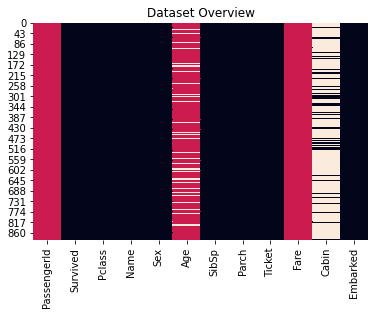

 Categerocial   Numeric   NaN 


In [19]:
dic_cols = {col:utils_recognize_type(data, col, max_cat=20) for col in data.columns}

heatmap = data.isnull()
for k,v in dic_cols.items():
  if v == "num":
    heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
  else:
    heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()

print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

Look at all those categories!  There is a good amount of missing data too (NaN).

All in all there are 885 rows with 12 columns analyzed.  The first column (passengerid) indicates the specific passenger aboard and is a good starting point for general analysis (a primary key, one may say).

The second column is survived, and if you want to really understand the likilihood of someone dying from this tragic event, it seems like a good feature to tart with.  This is the feature we want to predict for and will need to be reformated out of a categorical column to a binary one (1 for survived, 0 for deceased).

There are only two other numerical fields so far (age and fare).  And luckily only two areas that appear to have missing data (Age and Cabin).

Knowing what we now know, let's set up our index with the passenger id and let's pull out our prediction value and rename it for use later.

In [20]:
data = data.set_index("PassengerId")
data = data.rename(columns={"Survived":"Predict"})

So many ways to plot, so little time.  This notebook will have a variety of plotting schemes for different examples.  Let's start with a bar graph to understand the suvival rate a bit clearer.

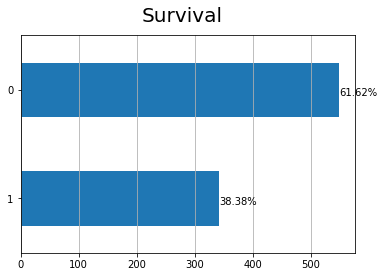

In [23]:
y = "Predict"

ax = data[y].value_counts().sort_values().plot(kind="barh")
totals = []
for i in ax.patches:
  totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_width()+.3, i.get_y()+.20,
          str(round((i.get_width()/total)*100, 2)) + '%',
          fontsize = 10, color = 'black')
ax.grid(axis = "x")
plt.suptitle("Survival", fontsize = 20)
plt.show()